## Daily Challenge: Web Scraping And Data Visualization

In [80]:
from bs4 import BeautifulSoup
import pandas as pd

In [91]:
!pip install selenium
!pip install bs4
!pip install chromedriver-autoinstaller

In [179]:
# Set up Selenium WebDriver (Chrome)
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Setup for headless Chrome
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [193]:
# Initialize the driver
driver = webdriver.Chrome(options=options)

# Navigate to the webpage
url = "https://www.bbc.com/weather/293397"
driver.get(url)

In [194]:
# Wait for the page to load (you may need to adjust the waiting time)
driver.implicitly_wait(10)

# Extract HTML content
html_content = driver.page_source

# Close the browser
#driver.quit()

In [195]:
# Parse HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

In [196]:
# Extract relevant data (e.g., dates, numerical values, categories)
dates = [date.text.strip() for date in soup.select('.wr-date__long')]
temperatures = [temp.text.strip() for temp in soup.find_all('span', class_='wr-day-temperature__high-value')]
descriptions = [desc.text.strip() for desc in soup.find_all('div', class_='wr-day__weather-type-description')]


In [197]:
# Check the lengths of the lists
print("Number of Dates:", len(dates))
print("Number of Temperatures:", len(temperatures))
print("Number of Descriptions:", len(descriptions))


Number of Dates: 13
Number of Temperatures: 13
Number of Descriptions: 14


In [198]:
 # Organize the scraped data into a structured format (e.g., Pandas DataFrame)
data = {'Date': dates, 'Temperature': temperatures, 'Description': descriptions[1:]}
df = pd.DataFrame(data)

df

,Date,Temperature,Description
0,Tuesday 9th January,21° 70°,Sunny and a moderate breeze
1,Wednesday 10th January,19° 67°,Thundery showers and a moderate breeze
2,Thursday 11th January,18° 64°,Light rain showers and a moderate breeze
3,Friday 12th January,18° 65°,Light rain showers and a moderate breeze
4,Saturday 13th January,20° 67°,Sunny and a moderate breeze
5,Sunday 14th January,18° 65°,Light rain showers and a fresh breeze
6,Monday 15th January,16° 61°,Light rain showers and a moderate breeze
7,Tuesday 16th January,18° 64°,Sunny and a gentle breeze
8,Wednesday 17th January,19° 66°,Light rain showers and a gentle breeze
9,Thursday 18th January,20° 68°,Sunny and light winds


In [208]:
df['Temperature'] = df['Temperature'].str.extract(r'(\d+)')
df = df.astype({'Temperature':'int'})

In [211]:
# Perform basic analysis
df['Temperature'].describe()

count    13.000000
mean     19.000000
std       1.354006
min      16.000000
25%      18.000000
50%      19.000000
75%      20.000000
max      21.000000
Name: Temperature, dtype: float64

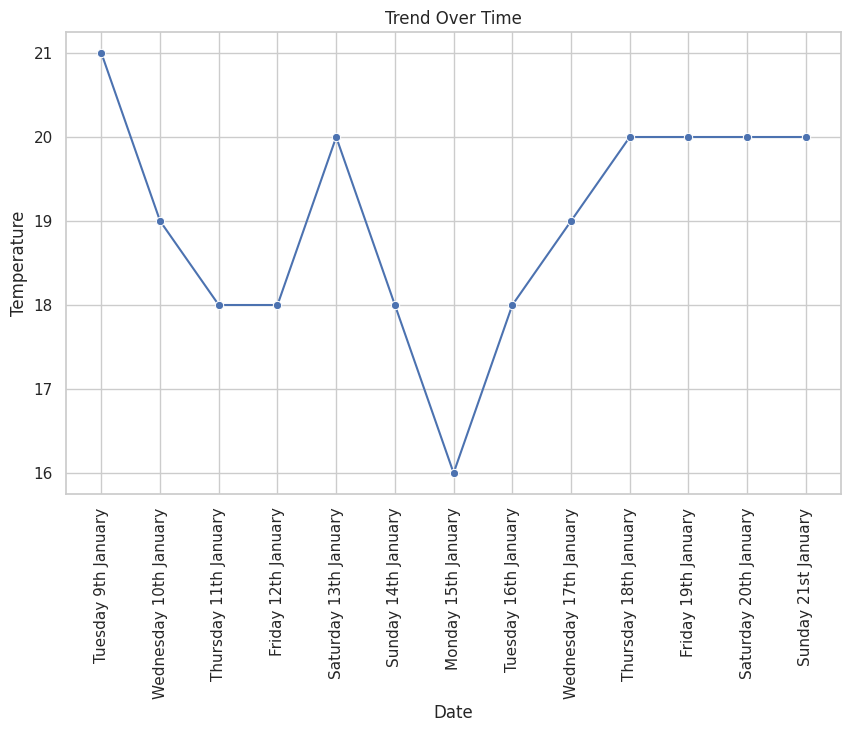

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Temperature', data=df, marker='o')

# Set plot labels and title
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Temperature')
plt.title('Trend Over Time')

# Show the plot
plt.show()
